<a href="https://colab.research.google.com/github/Nadaramadan1/Elevvo-internship-projects/blob/main/Loan_Approval_Prediction_Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
data.shape

(4269, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
data.drop(columns=['loan_id'], inplace=True)


In [ ]:
data.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [ ]:
data.duplicated().sum()

np.int64(0)

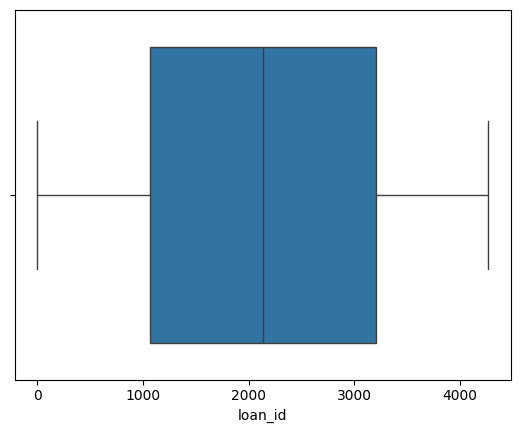

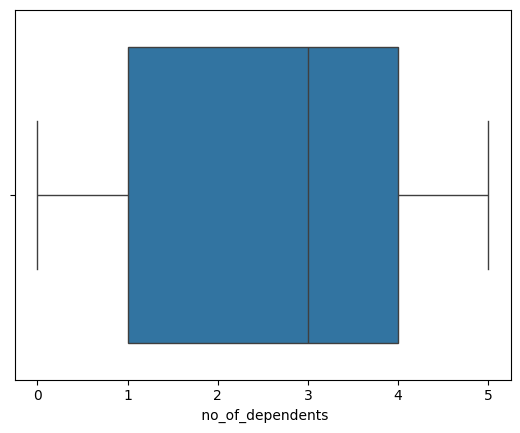

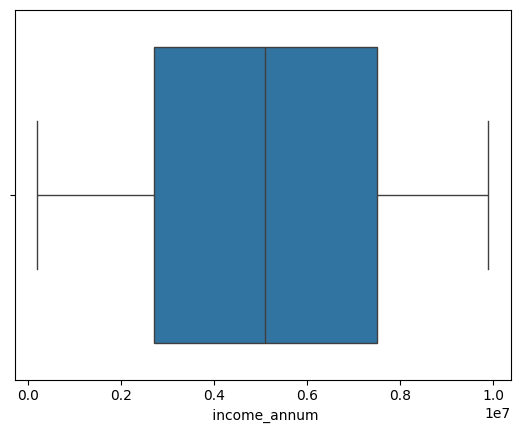

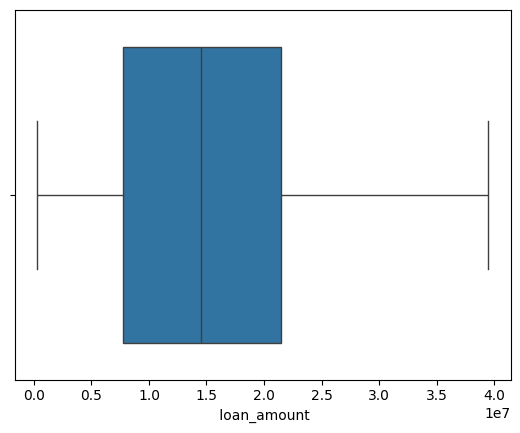

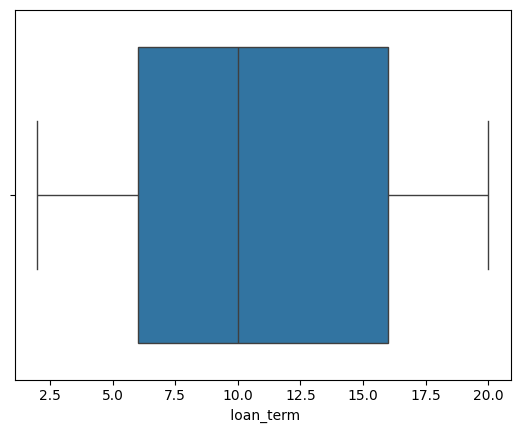

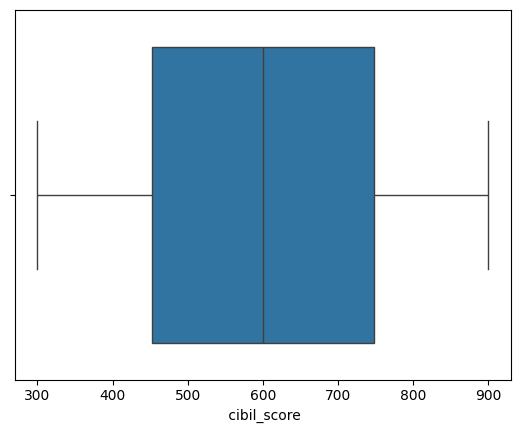

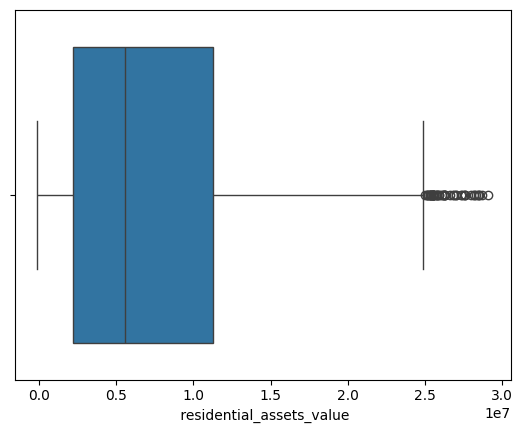

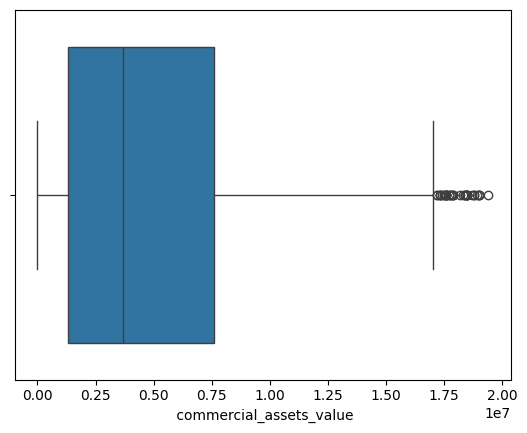

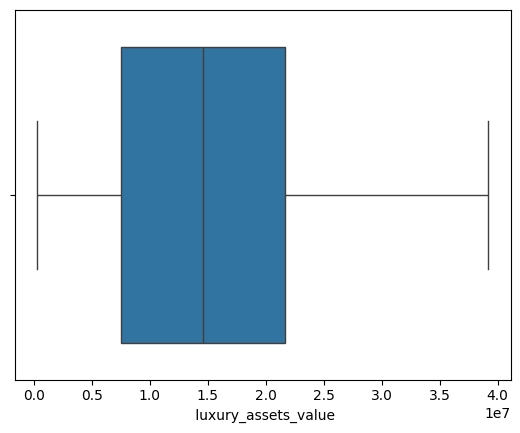

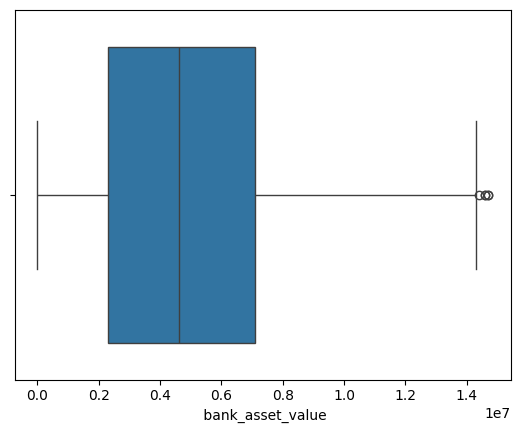

In [ ]:
numerical_col=data.select_dtypes(include=np.number).columns
categorical_col=data.select_dtypes(include='object').columns
for col in numerical_col:
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
# Select numerical columns
numerical_col = data.select_dtypes(include=np.number).columns

# Define capping function
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply to all numerical columns
for col in numerical_col:
    data = cap_outliers(data, col)

# Optional: Check results
data.describe()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059288e+06,1.512057e+07,10.900445,599.932012,7.460600e+06,4.961273e+06,1.511396e+07,4.971398e+06
std,1231.751897,1.695910,2.803752e+06,9.004017e+06,5.709187,172.342750,6.465620e+06,4.354829e+06,9.065795e+06,3.231547e+06
min,43.680000,0.000000,3.000000e+05,7.000000e+05,2.000000,304.000000,0.000000e+00,0.000000e+00,7.000000e+05,2.000000e+05
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4226.320000,5.000000,9.800000e+06,3.570000e+07,20.000000,894.320000,2.540000e+07,1.673200e+07,3.603200e+07,1.310000e+07


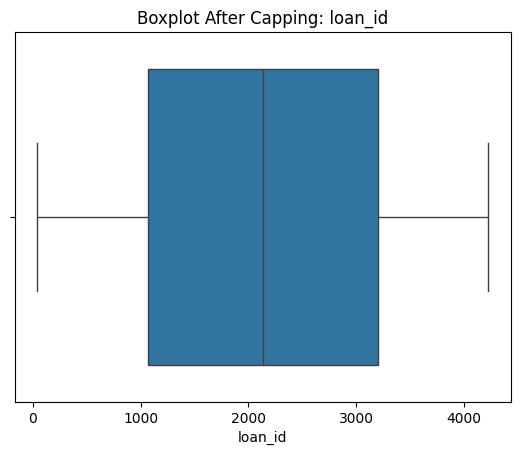

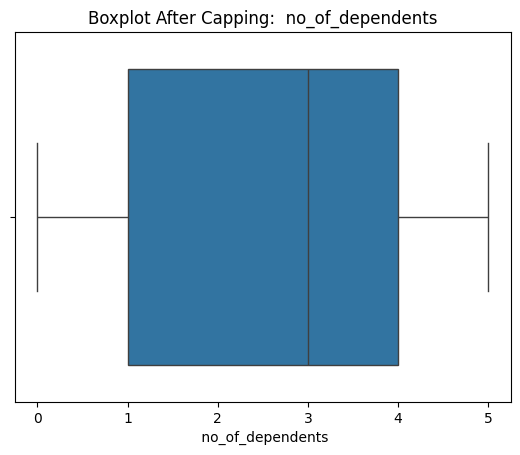

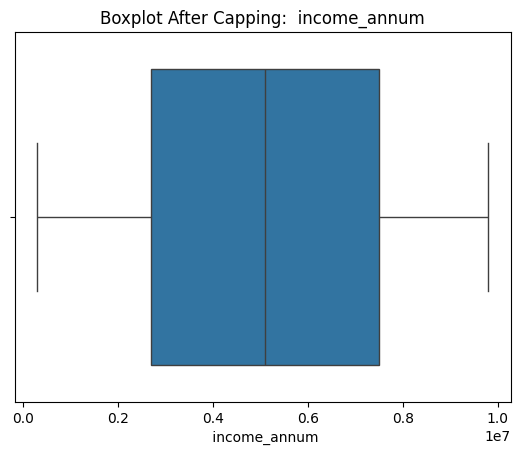

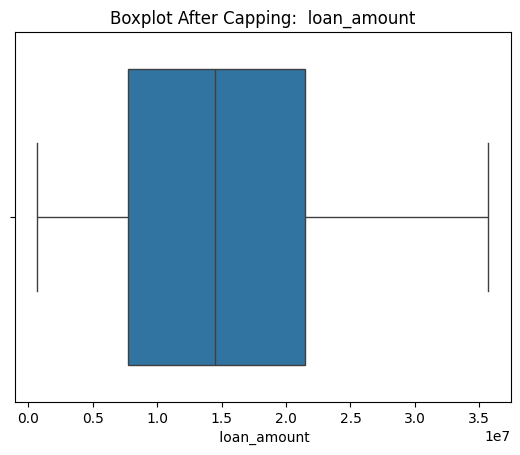

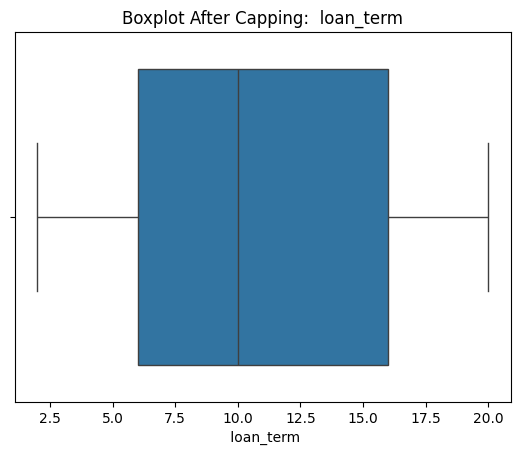

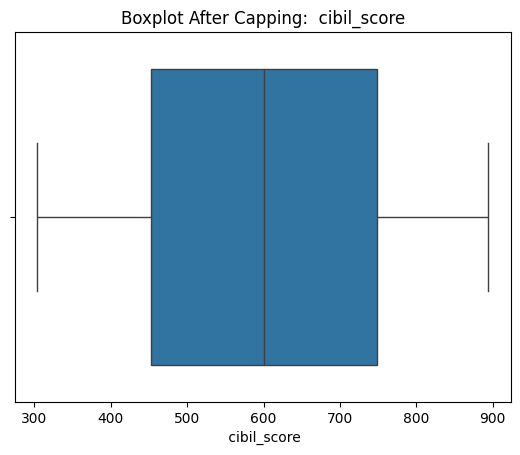

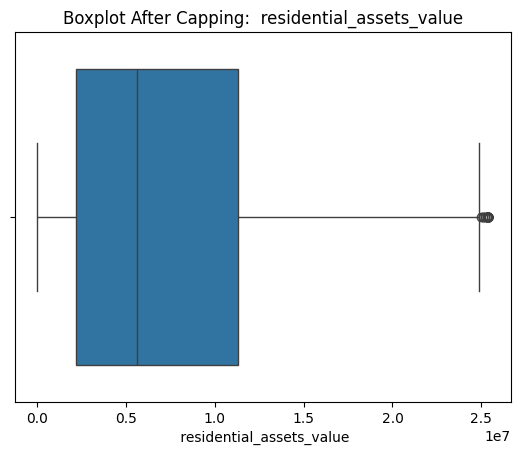

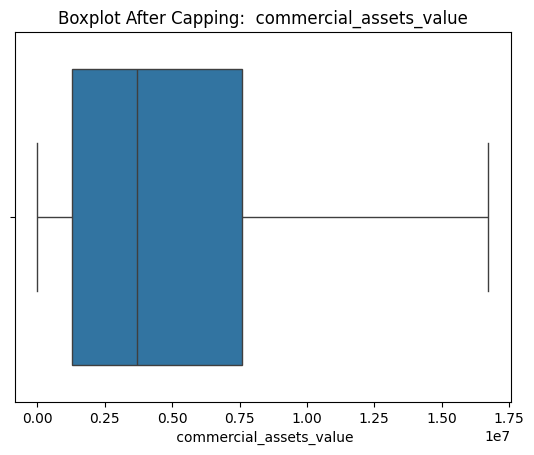

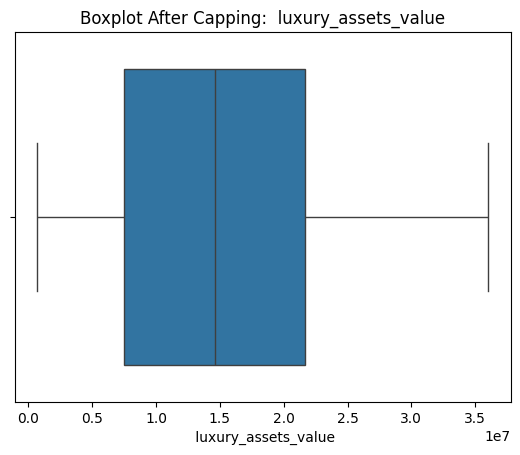

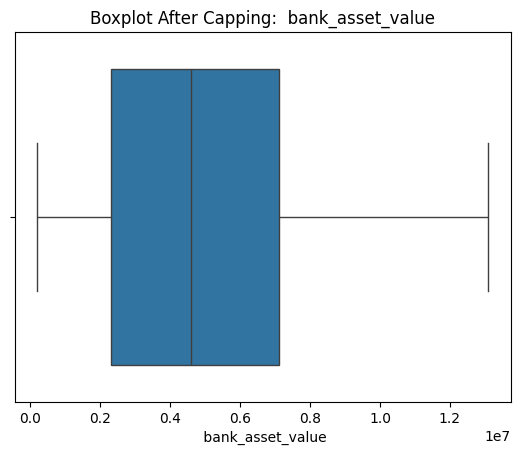

In [ ]:
# Before capping (already done earlier)
for col in numerical_col:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot After Capping: {col}')
    plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

# Remove leading spaces from column names
data.columns = data.columns.str.lstrip()

for col in ['education', 'self_employed', 'loan_status']:
    data[col] = label_enc.fit_transform(data[col])
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,43.68,2,0,0,9600000,29900000,12,778.0,2400000,16732000.0,22700000.0,8000000,0
1,43.68,0,1,1,4100000,12200000,8,417.0,2700000,2200000.0,8800000.0,3300000,1
2,43.68,3,0,0,9100000,29700000,20,506.0,7100000,4500000.0,33300000.0,12800000,1
3,43.68,3,0,0,8200000,30700000,8,467.0,18200000,3300000.0,23300000.0,7900000,1
4,43.68,5,1,1,9800000,24200000,20,382.0,12400000,8200000.0,29400000.0,5000000,1


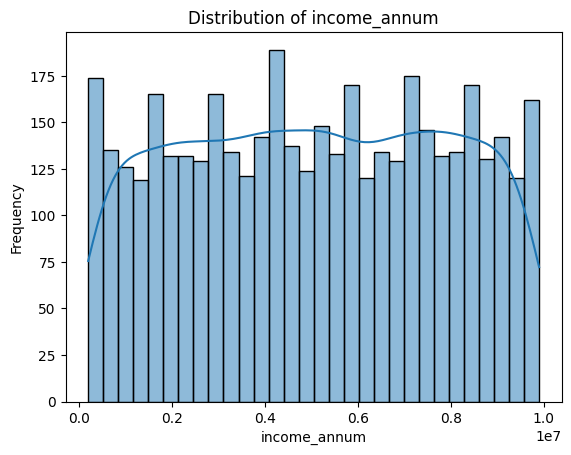

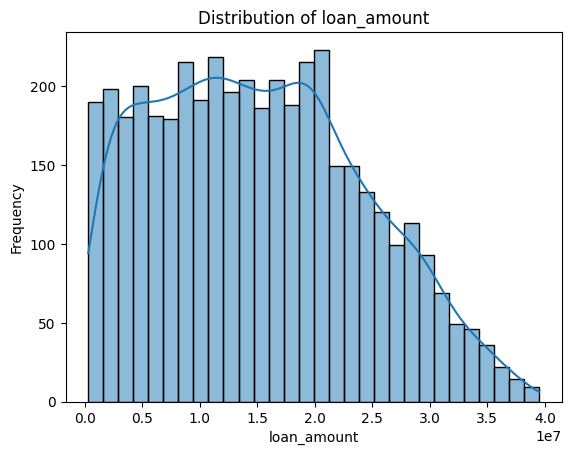

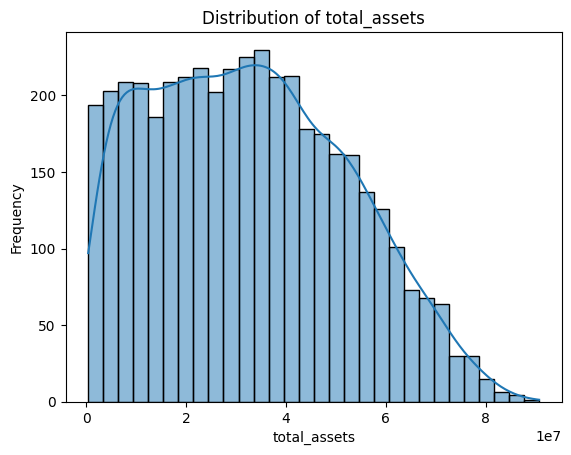

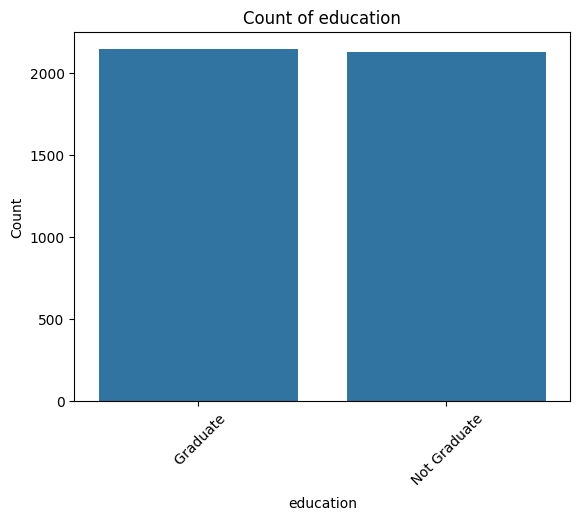

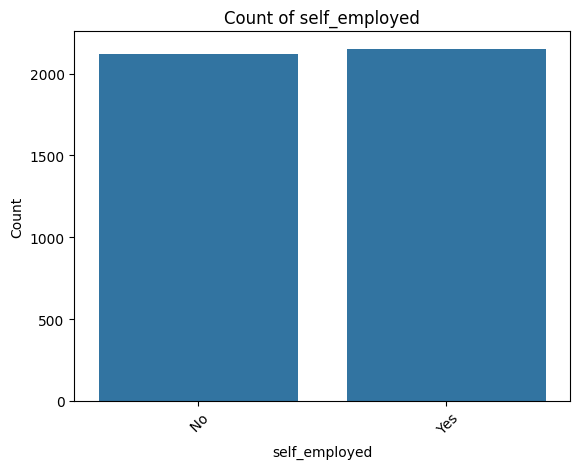

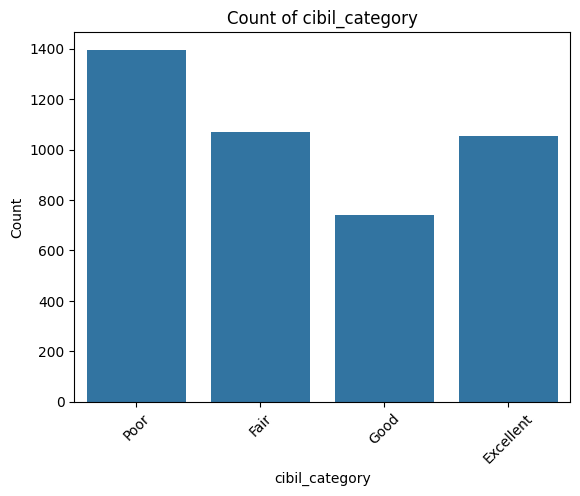

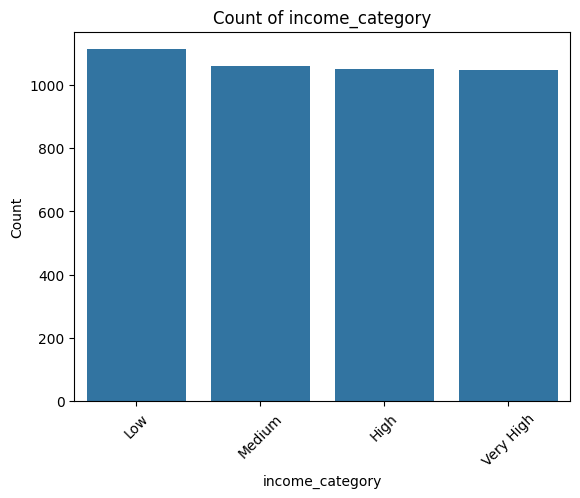

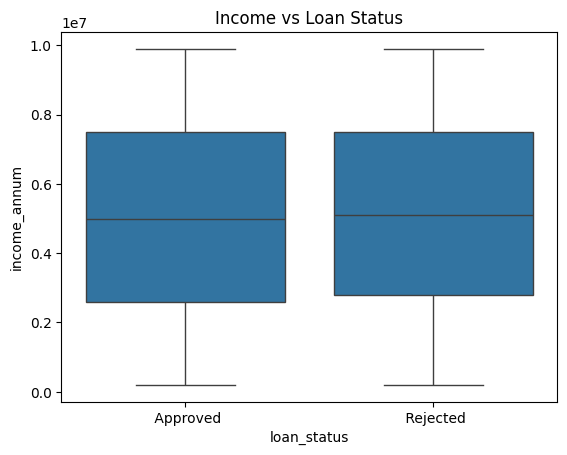

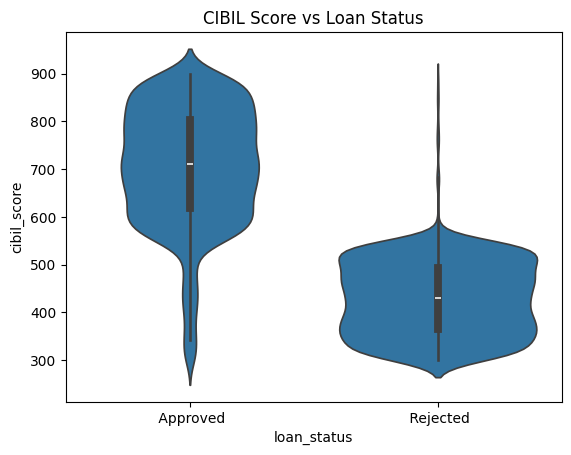

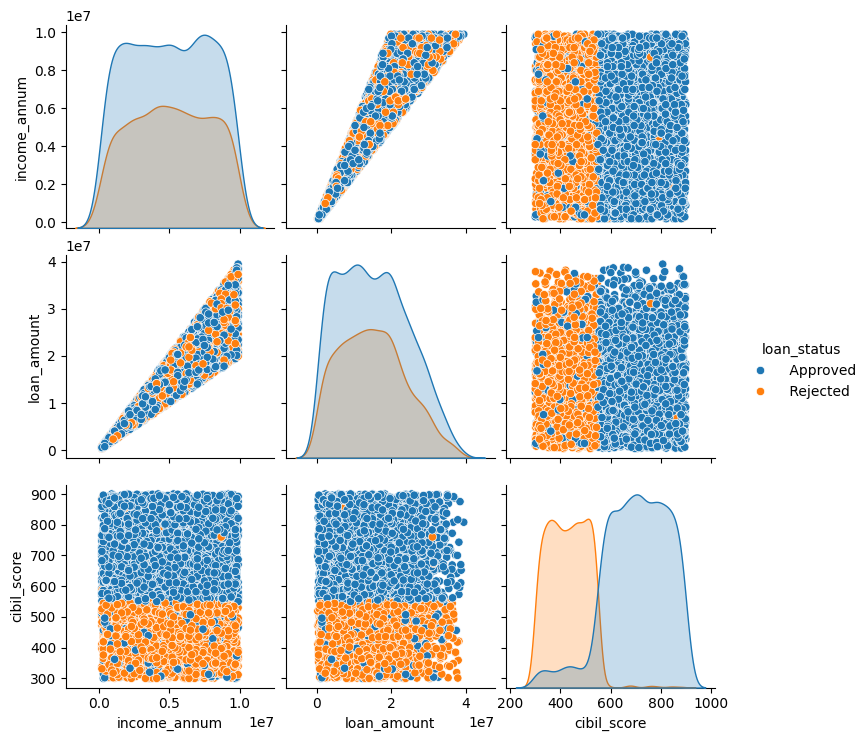

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Remove leading spaces from column names
data.columns = data.columns.str.lstrip()

# Feature Engineering (moved from later cells)
data['total_assets'] = data['residential_assets_value'] + data['commercial_assets_value'] + data['luxury_assets_value'] + data['bank_asset_value']
data['cibil_category'] = pd.cut(data['cibil_score'], bins=[300, 500, 650, 750, 900], labels=['Poor', 'Fair', 'Good', 'Excellent'])
data['income_category'] = pd.qcut(data['income_annum'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


# Distribution plots for key numerical features
for col in ['income_annum', 'loan_amount', 'total_assets']:
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Count plots for categorical features
for col in ['education', 'self_employed', 'cibil_category', 'income_category']:
    sns.countplot(x=data[col])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

# Loan status vs income and CIBIL score
sns.boxplot(x='loan_status', y='income_annum', data=data)
plt.title('Income vs Loan Status')
plt.show()

sns.violinplot(x='loan_status', y='cibil_score', data=data)
plt.title('CIBIL Score vs Loan Status')
plt.show()

# Pairplot for key features
sns.pairplot(data, vars=['income_annum', 'loan_amount', 'cibil_score'], hue='loan_status')

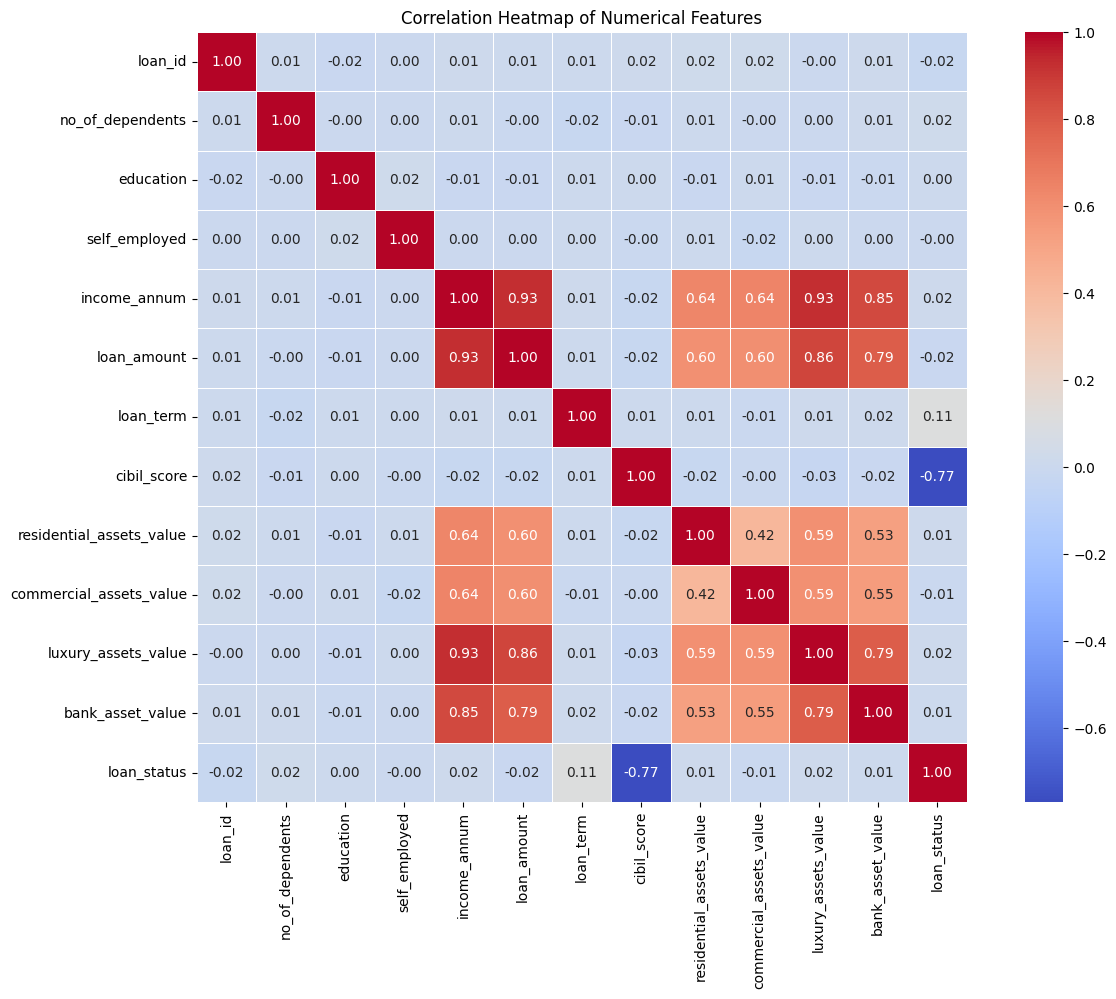

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [ ]:
# Total asset value
data['total_assets'] = data['residential_assets_value'] + data['commercial_assets_value'] + data['luxury_assets_value'] + data['bank_asset_value']

# Debt-to-income ratio
data['debt_income_ratio'] = data['loan_amount'] / data['income_annum']

# CIBIL score per loan term
data['cibil_per_term'] = data['cibil_score'] / data['loan_term']


In [ ]:
# CIBIL score bins
data['cibil_category'] = pd.cut(data['cibil_score'], bins=[300, 500, 650, 750, 900], labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Income bins
data['income_category'] = pd.qcut(data['income_annum'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [ ]:
for col in ['income_annum', 'loan_amount', 'total_assets']:
    data[f'log_{col}'] = np.log1p(data[col])


In [ ]:
data.drop(columns=['loan_id'], inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('loan_status', axis=1)
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns to be one-hot encoded
categorical_features = ['cibil_category', 'income_category']

# Create a column transformer to apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns as they are
)

# Apply the preprocessor to the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Apply SMOTE separately
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)

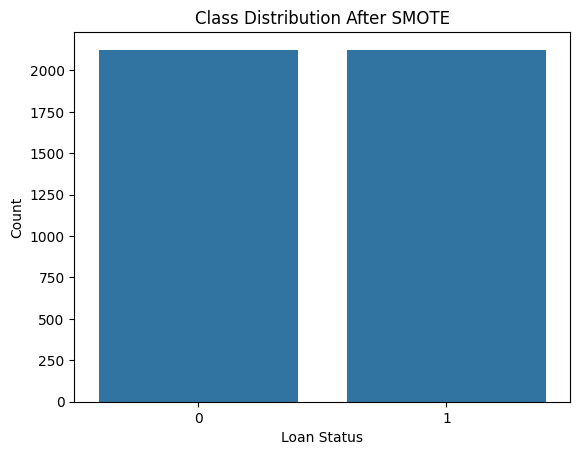

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize class distribution after SMOTE
sns.countplot(x=y_train_res)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()



🔍 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       531
           1       0.89      0.89      0.89       323

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854

AUC Score: 0.97

🔍 Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       531
           1       1.00      0.99      1.00       323

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854

AUC Score: 1.00


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:37:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       531
           1       1.00      0.99      0.99       323

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854

AUC Score: 1.00


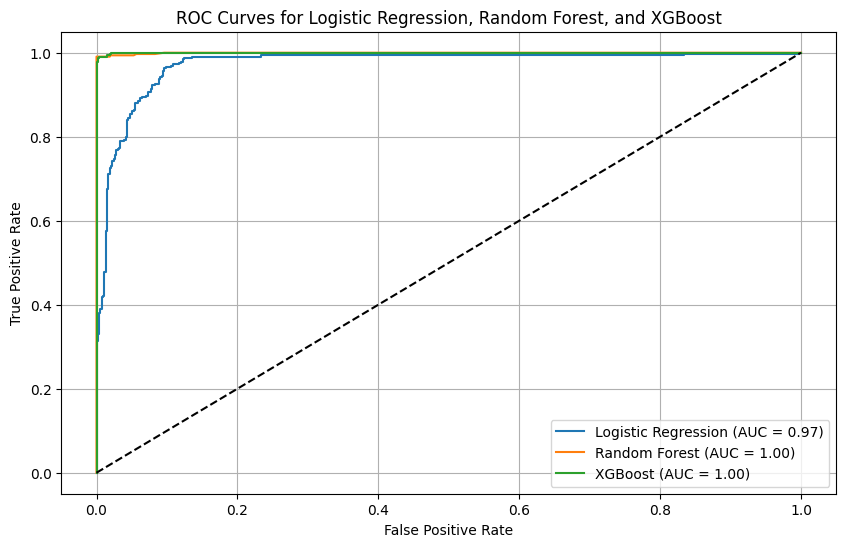

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_transformed)
    y_proba = model.predict_proba(X_test_transformed)[:, 1]

    print(f"\n🔍 {name} Performance:")
    print(classification_report(y_test, y_pred))
    print(f"AUC Score: {roc_auc_score(y_test, y_proba):.2f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for Logistic Regression, Random Forest, and XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


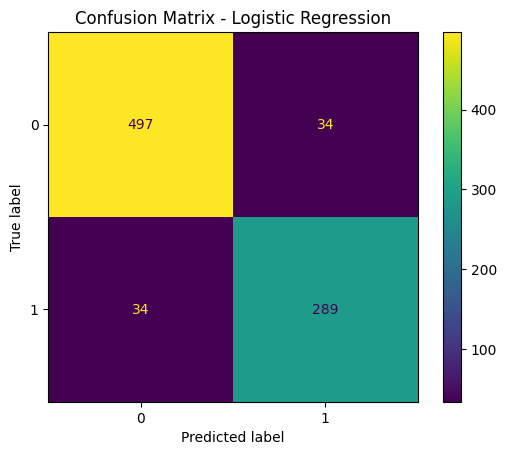

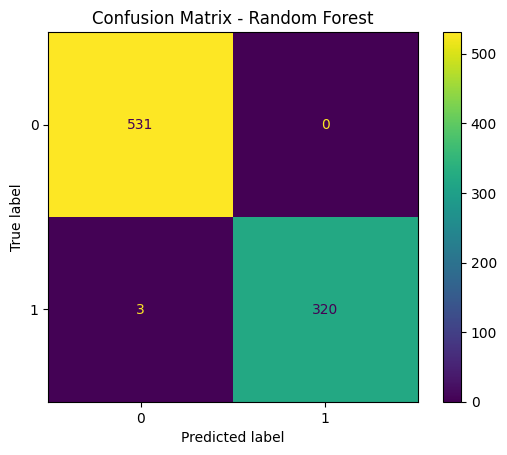

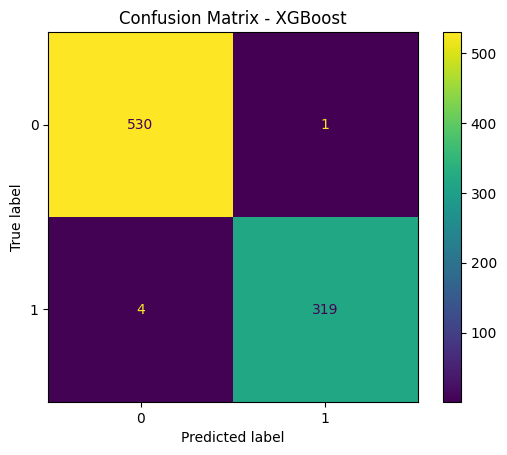

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test_transformed)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


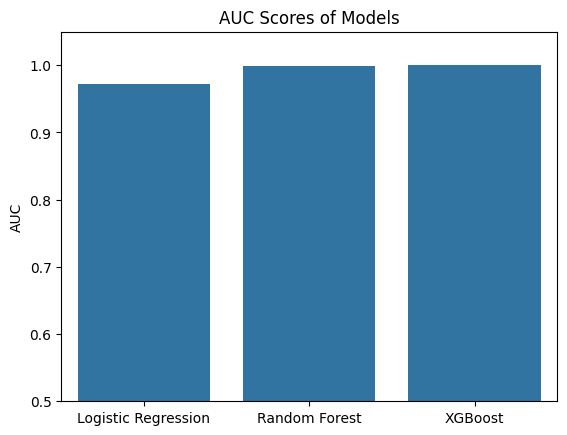

In [ ]:
auc_scores = {}
for name, model in models.items():
    y_proba = model.predict_proba(X_test_transformed)[:, 1]
    auc_scores[name] = roc_auc_score(y_test, y_proba)

sns.barplot(x=list(auc_scores.keys()), y=list(auc_scores.values()))
plt.title('AUC Scores of Models')
plt.ylabel('AUC')
plt.ylim(0.5, 1.05)
plt.show()


🔍 Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       531
           1       1.00      0.99      1.00       323

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854

AUC Score: 0.9977261198859562


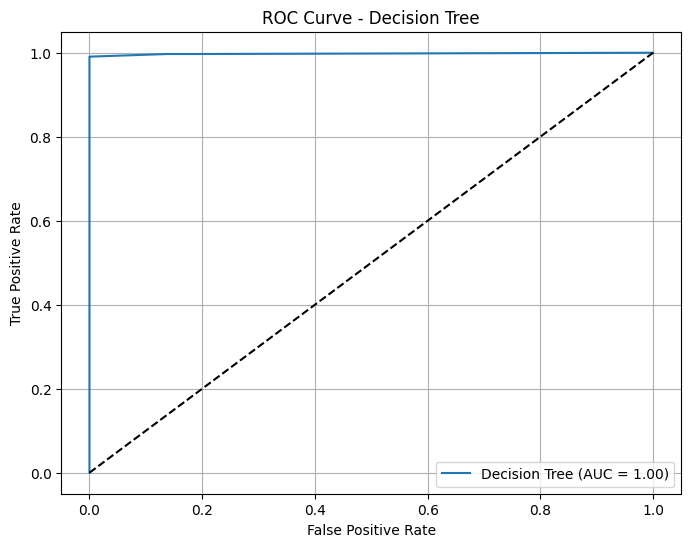

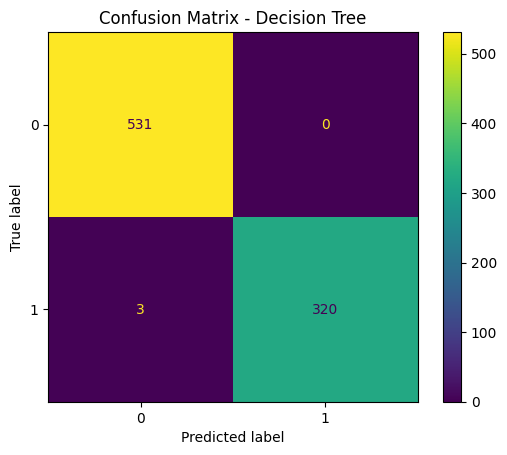

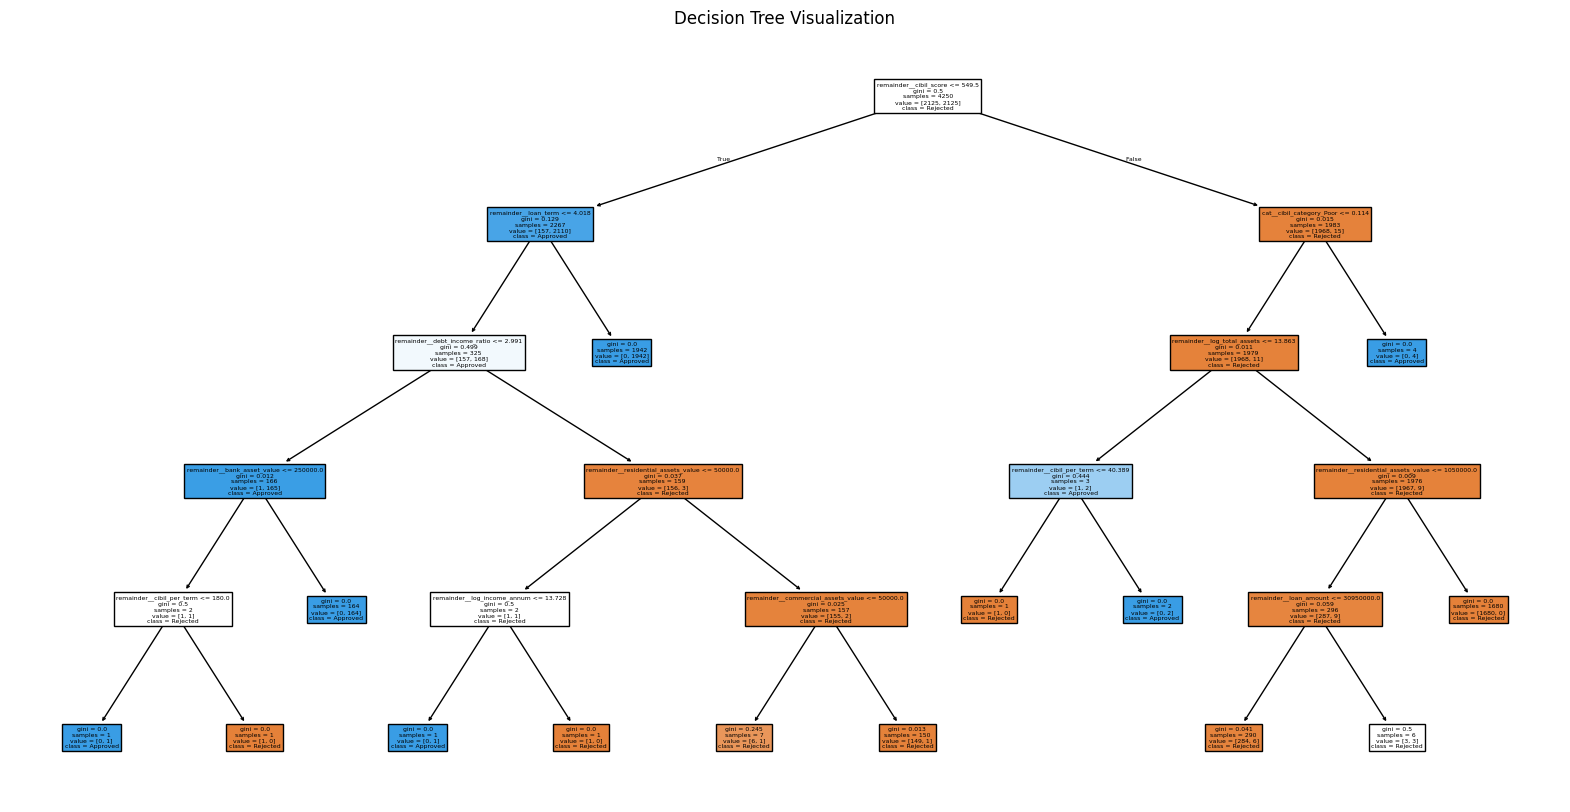

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test_transformed)
y_proba_dt = dt_model.predict_proba(X_test_transformed)[:, 1]

print("🔍 Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("AUC Score:", roc_auc_score(y_test, y_proba_dt))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Confusion Matrix
cm_disp = ConfusionMatrixDisplay.from_estimator(dt_model, X_test_transformed, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=['Rejected', 'Approved'])
plt.title("Decision Tree Visualization")
plt.show()
